In [ ]:
# merging the data to see trends

In [ ]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Path to your folder containing the Excel files
folder_path = "/home/udit/Documents/Github/ISSA/rainfall_data_analysis/rerainfall_data_1901_1999"  # Replace with your folder path

# Load all Excel files
file_list = glob.glob(os.path.join(folder_path, "*uk.xlsx"))

# Dictionary to hold DataFrames for each year
yearly_dataframes = {}

# Read each file and store DataFrame in the dictionary
for number, file in enumerate(file_list, 0):
    if number > 15:  # Only load the first 16 files
        break
    year = int(file.split("/")[-1][:4])  # Extract the year from the filename
    df = pd.read_excel(file, header=1)
    df['Year'] = year  # Add a 'Year' column to identify the file's year
    yearly_dataframes[year] = df  # Store DataFrame in dictionary, keyed by year

# Verify the data is loaded correctly
print(f"Loaded data for {len(yearly_dataframes)} years.")
print("Available years:", list(yearly_dataframes.keys()))

# Select one FID's data as an example (you can iterate over all FIDs)
fid_example = yearly_dataframes[list(yearly_dataframes.keys())[0]]  # Using the first year as an example

# Assuming that the relevant data starts from the second column and ends before the last column
fid_series = fid_example.groupby('Year').mean().iloc[:, 1:366].mean(axis=0)  # Average across years for each day

# Perform seasonal decomposition
result = seasonal_decompose(fid_series, period=365, model='additive')

# Plot the decomposition
result.plot()
plt.show()


In [10]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Path to your folder containing the Excel files
folder_path = "/home/udit/Documents/Github/ISSA/rainfall_data_analysis/rerainfall_data_1901_1999"  # Replace with your folder path

# Load all Excel files
file_list = glob.glob(os.path.join(folder_path, "*uk.xlsx"))

# Dictionary to hold DataFrames for each year
yearly_dataframes = {}

# Read each file and store DataFrame in the dictionary
for number, file in enumerate(file_list, 0):
    if number > 10:  # Only load the first 16 files
        break
    year = int(file.split("/")[-1][:4])  # Extract the year from the filename
    df = pd.read_excel(file, header=1)
    df['Year'] = year  # Add a 'Year' column to identify the file's year
    yearly_dataframes[year] = df  # Store DataFrame in dictionary, keyed by year



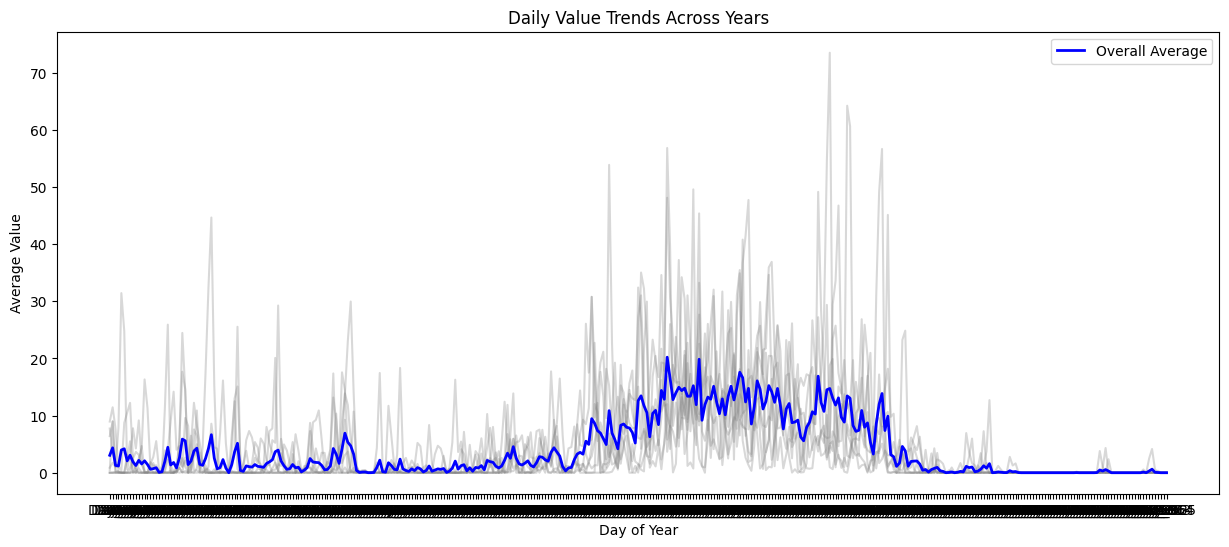

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a dictionary to store daily means for each year
daily_means_dict = {}

# Ensure that column names are strings
for year, df in yearly_dataframes.items():
    df.columns = df.columns.astype(str)  # Convert column names to strings
    
    # Filter columns that start with "Day_" and are numeric
    daily_columns = [col for col in df.columns if col.startswith("Day_") and pd.api.types.is_numeric_dtype(df[col])]
    
    # If no numeric columns are found, skip this year
    if not daily_columns:
        continue
    
    # Calculate the daily means
    daily_means_dict[year] = df[daily_columns].mean()

# Convert the dictionary to a DataFrame (rows = years, columns = days)
daily_means_df = pd.DataFrame.from_dict(daily_means_dict, orient="index")
daily_means_df.index.name = "Year"

# Calculate the overall daily average across all years
overall_average = daily_means_df.mean(axis=0)

# Plot yearly trends for average daily values
plt.figure(figsize=(15, 6))
for year in daily_means_df.index:
    plt.plot(daily_means_df.loc[year], alpha=0.3, color="gray")  # Each year's trend

plt.plot(overall_average, label="Overall Average", color="blue", linewidth=2)  # Overall average trend
plt.title("Daily Value Trends Across Years")
plt.xlabel("Day of Year")
plt.ylabel("Average Value")
plt.legend()
plt.show()


Loaded data for 11 years.
Available years: [1950, 1914, 1993, 1999, 1945, 1949, 1923, 1908, 1969, 1975, 1970]
   Year   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  Unnamed: 367  \
0  1950 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...           NaN   
1  1950 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...           NaN   
2  1950 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...           NaN   
3  1950 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...           NaN   
4  1950 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...           NaN   

   Unnamed: 368  Unnamed: 369  Unnamed: 370  Unnamed: 371  Unnamed: 372  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           Na

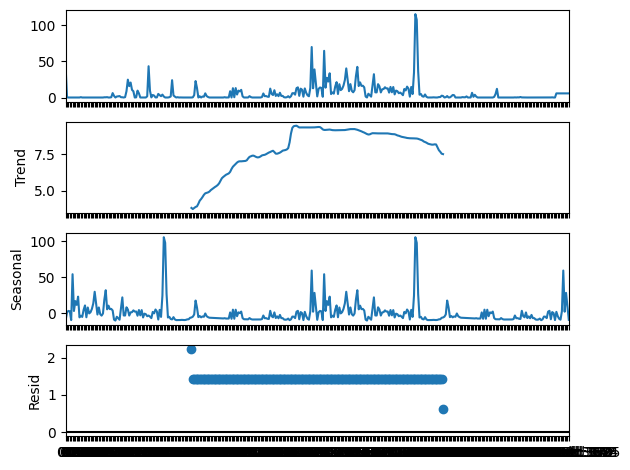

In [17]:
# Verify the data is loaded correctly
print(f"Loaded data for {len(yearly_dataframes)} years.")
print("Available years:", list(yearly_dataframes.keys()))

# Combine all data into one DataFrame
combined_df = pd.concat(yearly_dataframes.values(), ignore_index=True)

# Drop unnecessary columns (FID and 'Unnamed: 377')
combined_df = combined_df.drop(columns=['FID', 'Unnamed: 377'])

# Select only numeric columns for the mean calculation
numeric_columns = combined_df.select_dtypes(include=['number']).columns

# Check the data
print(combined_df[numeric_columns].head())

# Select one FID's data as an example (you can iterate over all FIDs)
fid_example = combined_df[numeric_columns]  # Use only numeric data

# Calculate the daily mean across all years for each day (Day_1 to Day_365)
daily_means = fid_example.iloc[:, 1:366].mean(axis=0)

# Fill missing values with the mean of the column
daily_means_filled = daily_means.fillna(daily_means.mean())

# Perform seasonal decomposition
result = seasonal_decompose(daily_means_filled, period=182, model='additive')

# Plot the decomposition
result.plot()
plt.show()





In [19]:

# (Optional) Additional Analysis: Plotting yearly trends or heatmap
# Calculate yearly mean values for visualization

# Exclude non-numeric columns (like 'FID' or datetime)
combined_df_cleaned = combined_df.drop(columns=['FID'])

# Group by 'Year', calculate mean for each year, and then compute the overall mean for each day (excluding the first column)
yearly_means = combined_df_cleaned.groupby('Year').mean().iloc[:, 1:].mean(axis=1)

# Plot the yearly mean trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_means, label="Yearly Average")
plt.title("Yearly Trend of Average Values (1901-1999)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend()
plt.show()



# (Optional) Heatmap of daily values by year
import seaborn as sns
pivot_table = combined_df.groupby('Year').mean().iloc[:, 1:366]  # Exclude 'FID'
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap="coolwarm", cbar_kws={'label': 'Average Value'})
plt.title("Heatmap of Daily Values by Year")
plt.xlabel("Day of Year")
plt.ylabel("Year")
plt.show()

KeyError: "['FID'] not found in axis"

- Summary of Plots
- Daily Average Trends (overall and by decade).
- Seasonal Decomposition (trend, seasonality, residuals).
- Heatmap of Yearly Patterns.
- Long-Term Trend Line.
- Anomaly Detection Plot.
- Forecasting Future Patterns.